In [1]:
import os
from linares_plot import *
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.optimize import curve_fit
from scipy import stats
import statsmodels.formula.api as smf

In [ ]:
### Aprox. 10.000.000 de rows 
### Takes about 40min to load
### path_ = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\firing_rates_100' ##sliding window of 100
### path_ = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\firing_rates_10' ##sliding window of 10
path_ = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\firing_rates'  ##sliding window of 10
files = os.listdir(path_)
frames=[]
for f in files:
    fx=pd.read_excel( os.path.join(path_,f))
    print(f)
    frames.append(fx)
#
df=pd.concat(frames)

In [ ]:
len(df)

In [ ]:
def parabola(x, a, b, c):
    return a*x**2 + b*x + c


def parabola_cent(x, a, b, c):
    return a*(x-1)**2 + b*x + c

In [ ]:
#alphas of each neuron

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as 

0 1367701 0.265


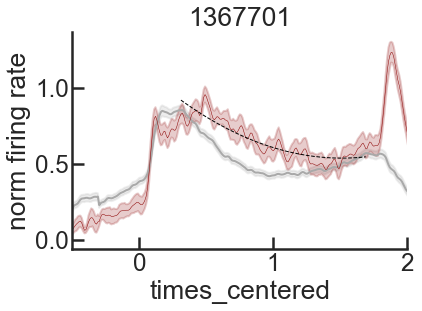

1 1367802 0.87


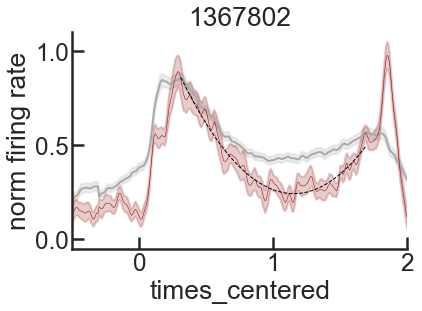

2 1367903 0.116


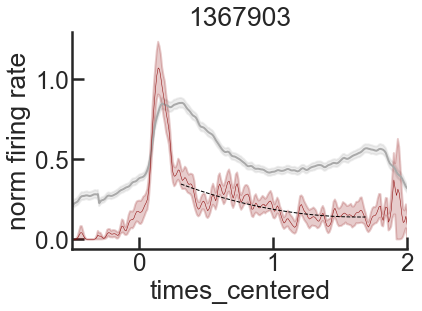

3 1369702 1.776


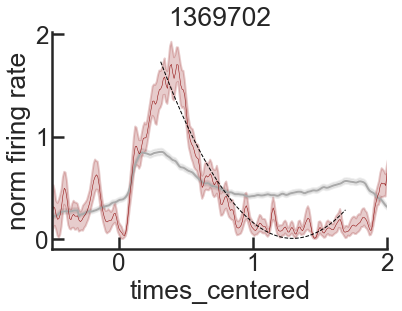

4 1369901 0.243


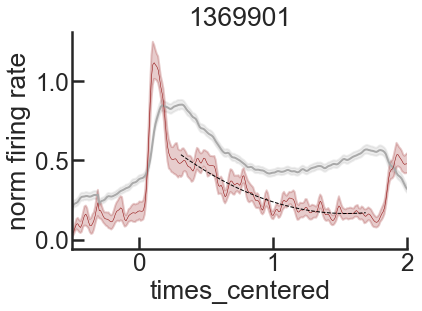

5 1370002 0.015


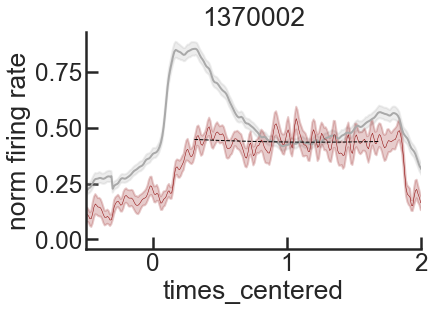

6 1370202 0.302


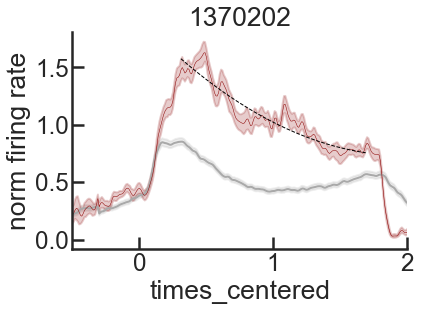

7 1371202 0.708


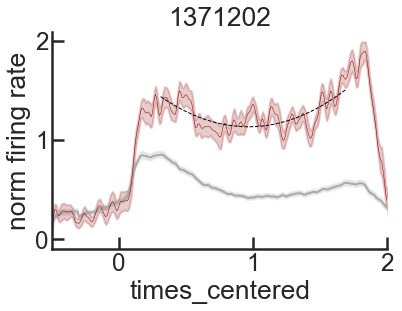

8 1371901 0.259


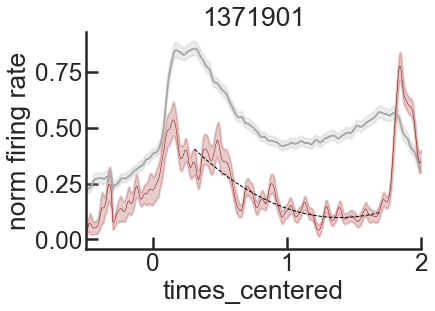

9 1372003 0.367


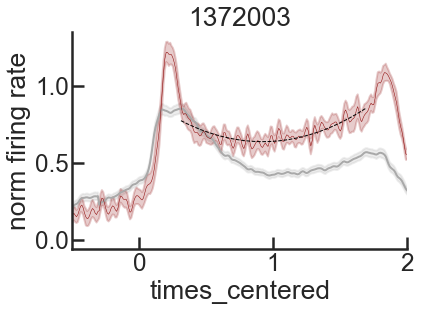

10 1372301 0.921


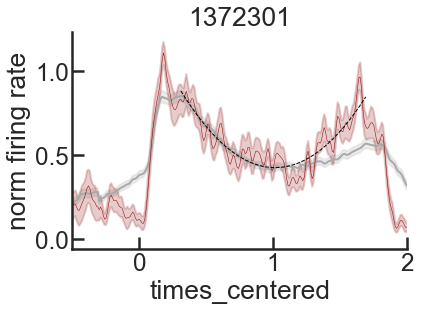

11 1372402 0.902


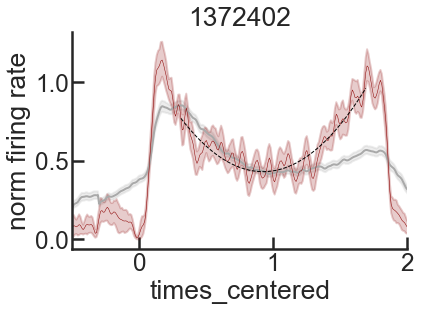

12 189168701 0.852


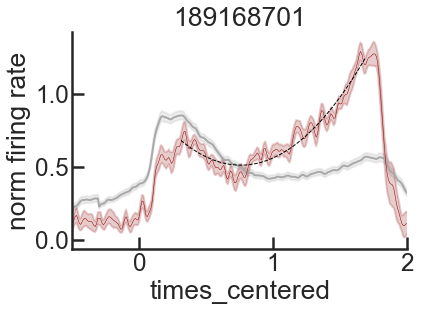

13 189169502 0.835


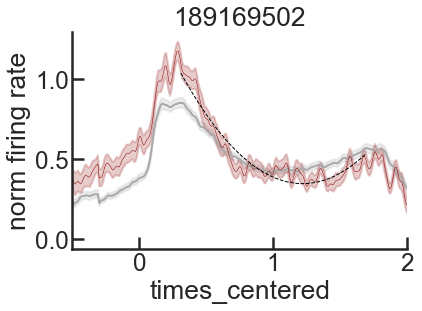

14 189171003 0.243


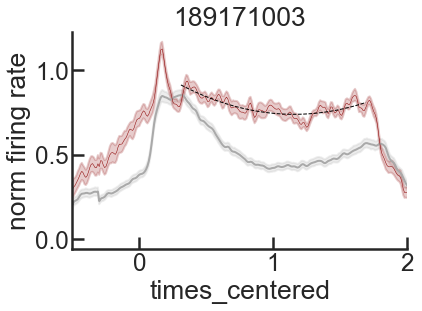

15 189171602 0.279


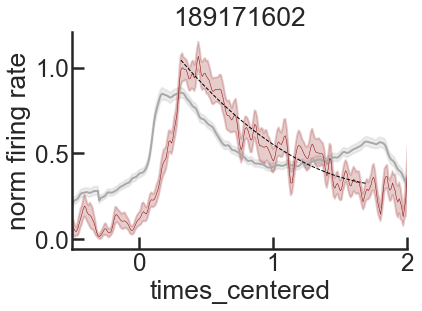

16 189172801 0.663


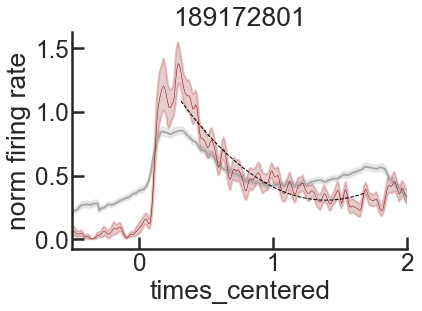

17 189173101 0.932


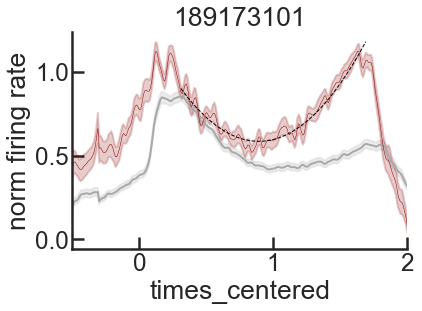

18 189173801 0.39


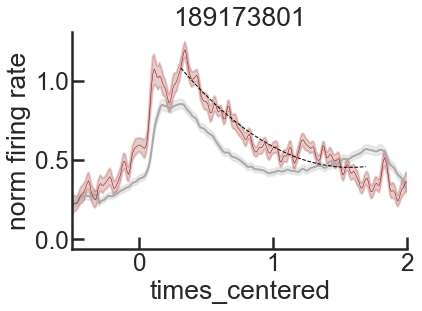

19 189174201 0.99


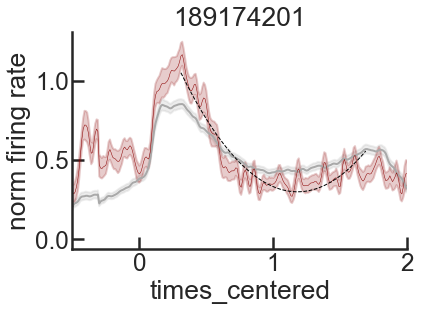

20 189175201 -0.187


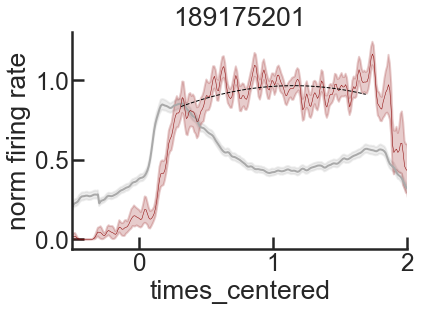

21 189175801 1.196


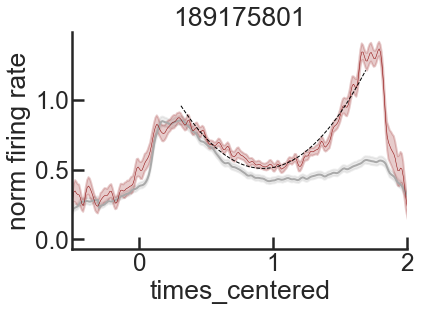

22 189176101 0.991


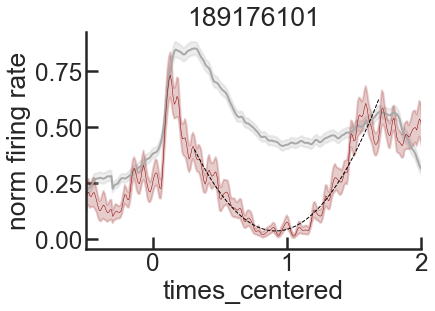

23 189176501 0.09


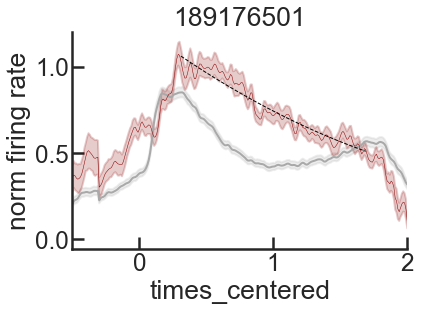

24 189176901 0.863


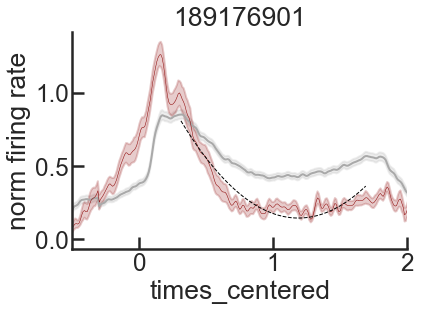

25 189177402 1.324


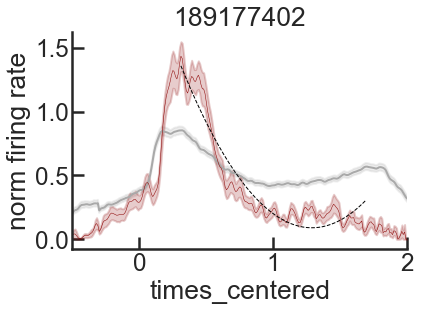

26 189177701 0.662


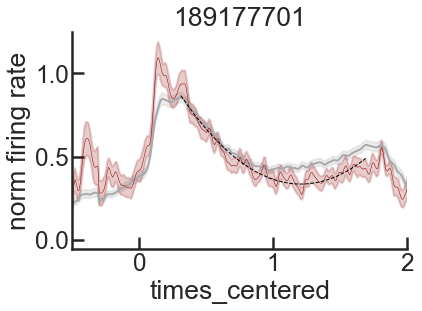

27 1891783 0.477


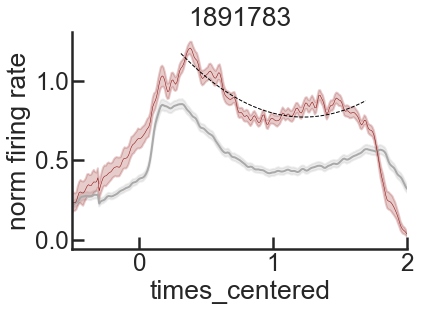

28 189179001 -0.137


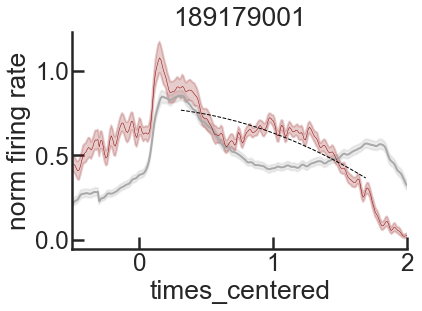

29 189179002 0.269


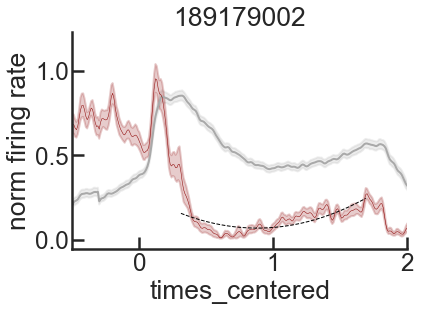

30 1891793 0.567


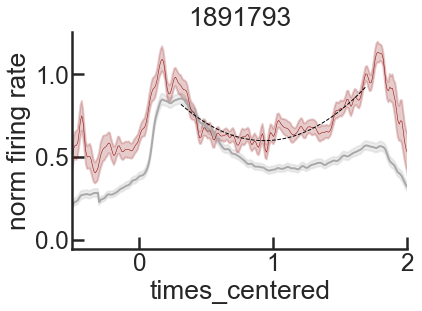

31 189179702 0.737


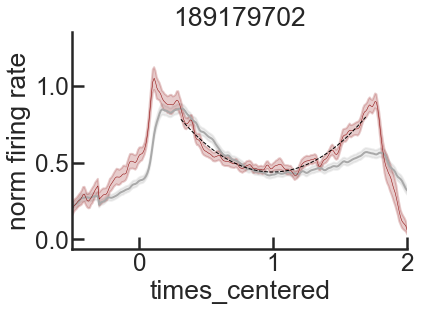

32 189180001 0.879


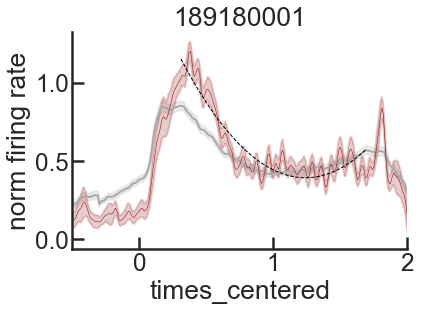

33 189181001 0.69


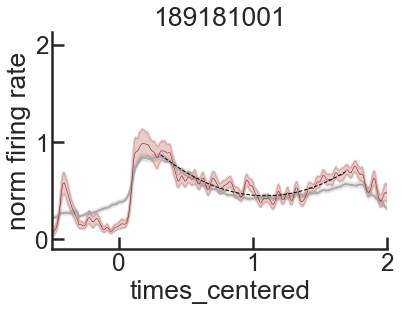

34 189181502 0.584


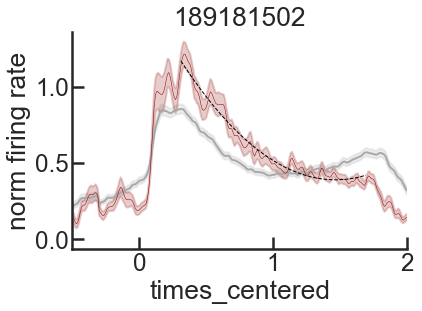

35 1891819 0.523


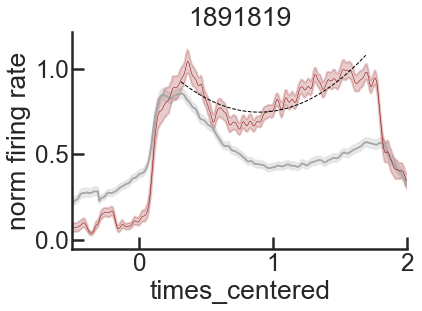

36 189182202 0.343


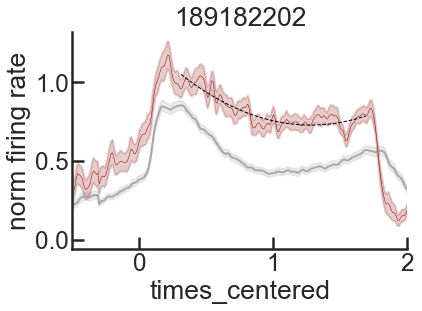

37 189182501 -0.799


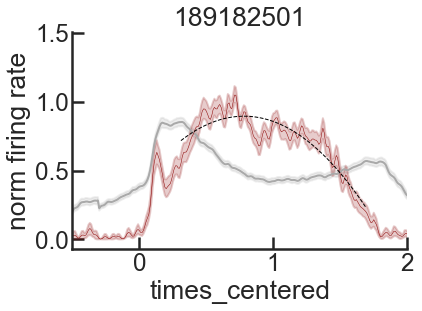

38 189182901 0.192


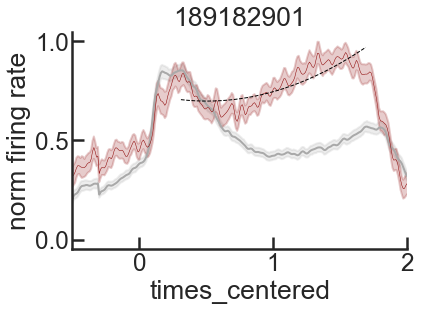

39 189183201 0.099


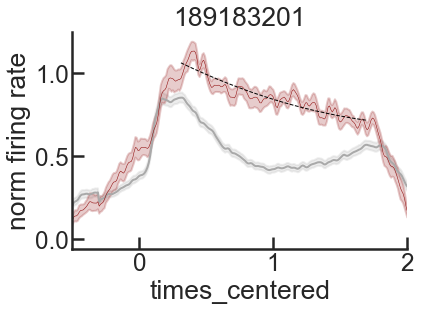

40 189183402 1.144


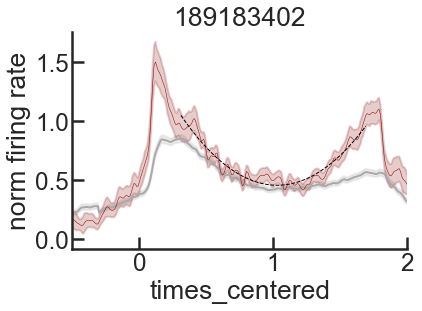

41 1891841 0.295


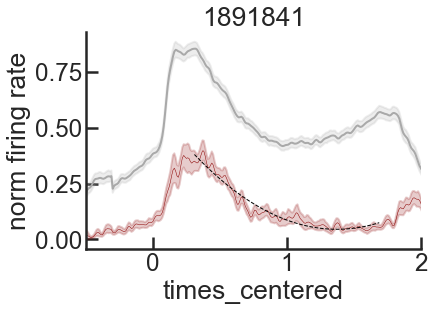

42 189184601 0.476


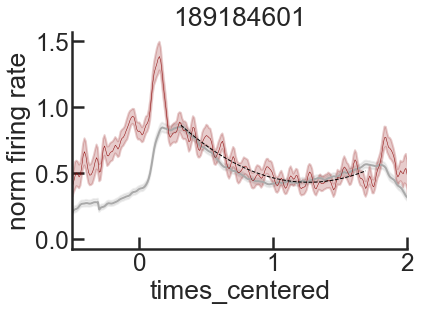

43 1891857 0.609


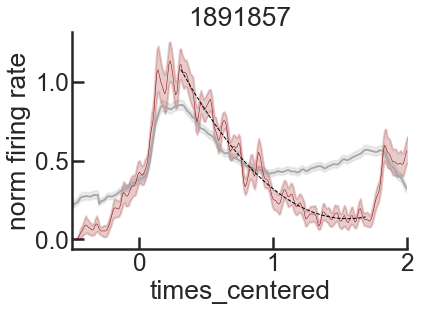

44 189186201 0.345


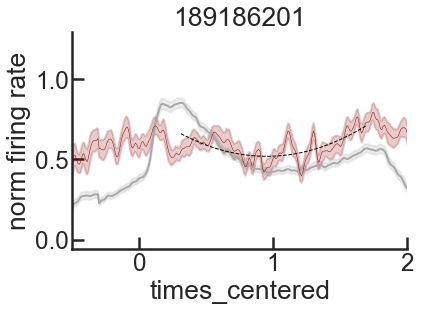

45 189187301 1.358


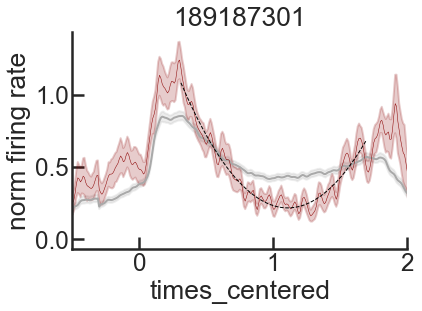

46 189188901 0.223


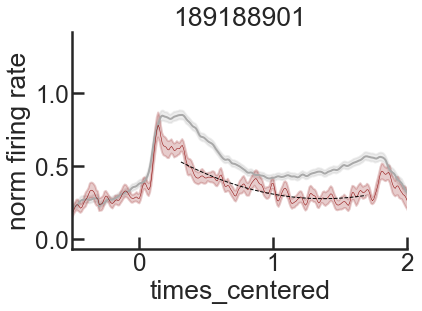

47 189189601 0.946


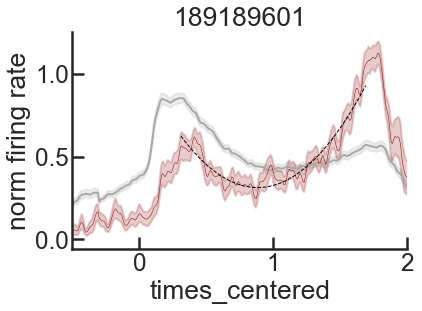

48 189191601 0.281


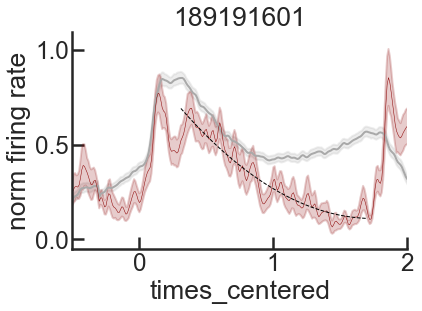

49 189191602 0.338


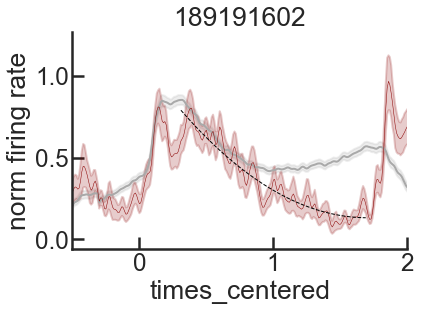

50 1891918 0.902


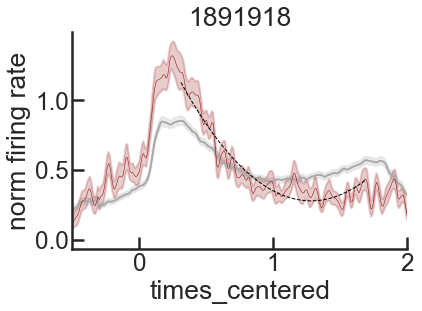

51 189192001 0.788


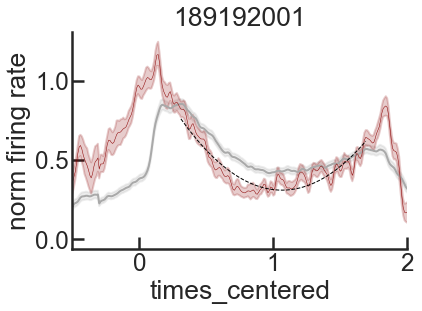

52 189192201 0.533


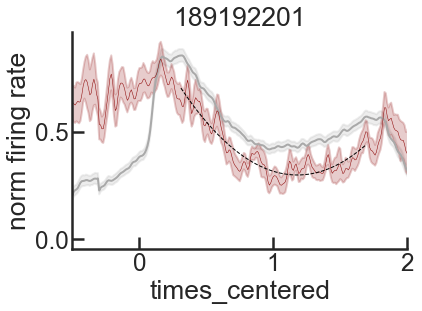

53 189192401 0.414


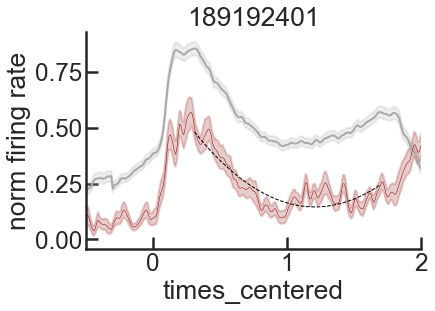

54 1891935 0.268


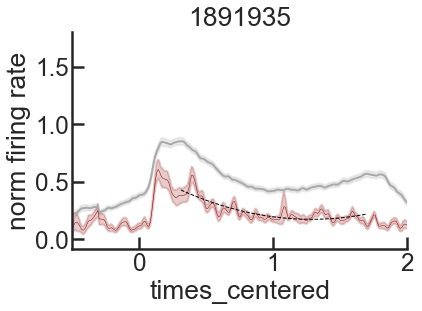

55 189194301 0.729


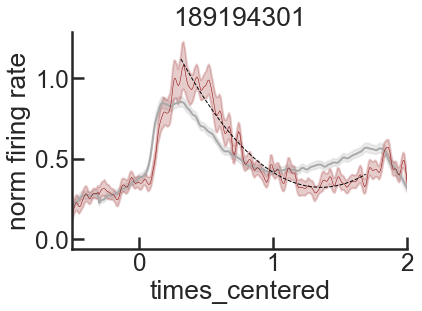

56 189195301 -0.408


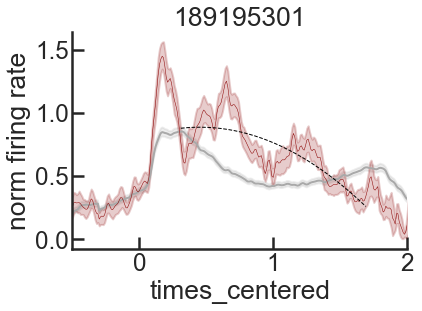

57 189196301 0.573


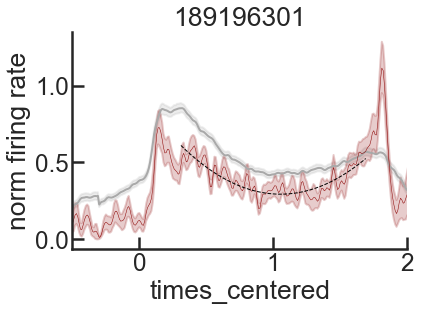

58 189196401 0.955


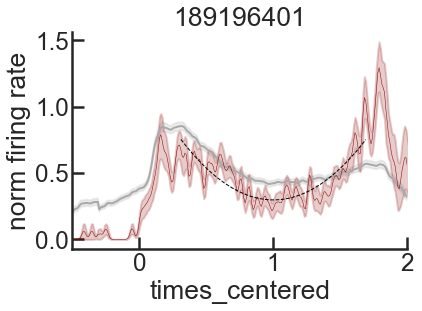

59 189209101 0.524


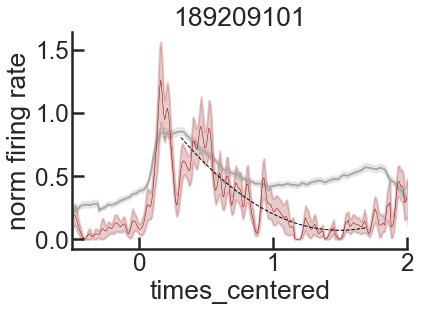

60 189209503 0.229


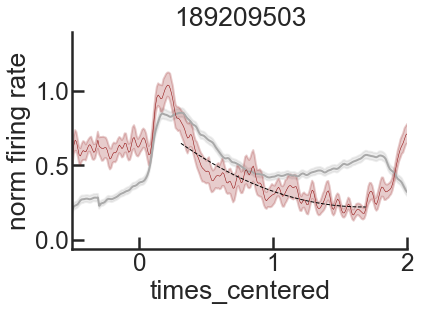

61 189210001 0.618


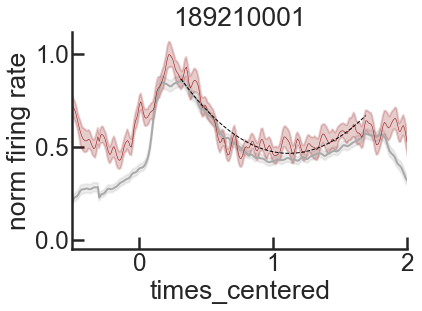

62 189210901 0.003


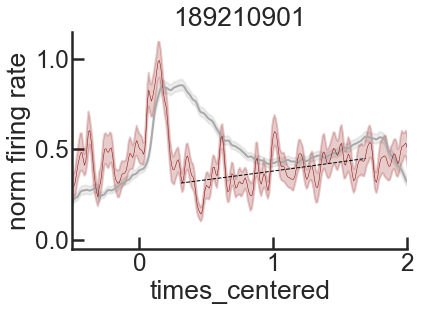

In [7]:
alphas_=[]

#target in RF with close and far distractors, DLPFC, correct trials, TDOA de 100 (0,100,2)
N_all = df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (df['TDOA']==0)] ## p=0.12


df_control_pfc = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') & (df['performance']==1) ]
df_control_pfc['time_centered_s'] = df_control_pfc['time_centered']/1000



for idx, neuron in enumerate(N_all.neuron.unique()):
    N = N_all.loc[N_all['neuron']==neuron]
    N['time_centered_s'] = N['time_centered']/1000
    plt.figure()
    sns.lineplot(x='time_centered_s', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
    sns.lineplot(x='time_centered_s', y='norm_firing_gauss', data=N, ci=68, color='darkred', linewidth=0.5)
    N1 = N.loc[(N['time_centered']>300) & (N['time_centered']<1700) ] ##100 - 1700 (700 around 1000, 300-1700)
    x = N1.time_centered.unique()/1000
    y = N1.groupby('time_centered').norm_firing_gauss.mean().values
    popt, pcov = curve_fit(parabola_cent, x, y, method='dogbox',  maxfev=1000 )
    #y_fit = [popt[0]*x**2 + popt[1]*x + popt[2] for x in x]
    y_fit = [popt[0]*(x-1)**2 + popt[1]*x + popt[2] for x in x]
    plt.plot(x, y_fit, 'k--', linewidth=1, label='parabolic fit')
    plt.title(str(neuron))
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.xlim(-0.5,2)
    plt.ylabel('norm firing rate')
    plt.xlabel('times_centered')
    print(idx, neuron, round(popt[0],3))
    plt.show()
    alphas_.append([neuron, round(popt[0],3)])

In [8]:
Alphas = pd.DataFrame(alphas_)
Alphas.columns=['neuron', 'alpha']
Alphas

,neuron,alpha
0,1367701,0.265
1,1367802,0.870
2,1367903,0.116
3,1369702,1.776
4,1369901,0.243
...,...,...
58,189196401,0.955
59,189209101,0.524
60,189209503,0.229
61,189210001,0.618


In [9]:
#decoding stregth of each neuron

In [10]:
### otra opcion es cambiar el heatmap e ir a por el de 900, que es donde lo hacen mejor...
path_CTD = 'C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\thesis_plots\\signal_HM_DLPFC_100.npy'
A = np.load(path_CTD)
decoding_500 = [np.mean(A[x][17:22, 17:22]) for x in range(len(A))] #the lower the worse
DLPFC_ = np.load('C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\FR_trials\\0_DLPFC.npy')
neuron_ = [Neuron for Neuron in np.unique(DLPFC_[:, 23])]

decoding_strenght = pd.DataFrame({'decoding error':decoding_500, 'neuron':neuron_} )
decoding_strenght

,decoding error,neuron
0,55.4528,1367701
1,58.6876,1367802
2,68.9324,1367903
3,67.1488,1369702
4,70.3896,1369901
...,...,...
58,58.5440,189196401
59,72.8920,189209101
60,67.8296,189209503
61,64.7528,189210001


In [11]:
dss=[]
for i in range(len(Alphas)):
    d_s = decoding_strenght.loc[decoding_strenght['neuron']== str(Alphas['neuron'].iloc[i]), 'decoding error' ].iloc[0]
    dss.append(d_s)
    
    
Alphas['decoding_error']=dss

In [12]:
Alphas['decoding'] = 1-Alphas['decoding_error']
Alphas['TDOA']==100

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


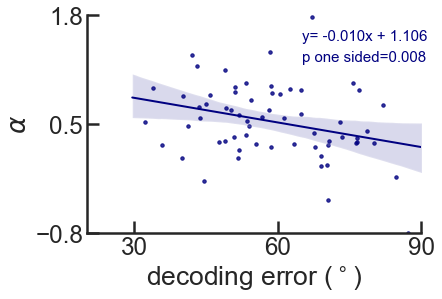

                            OLS Regression Results                            
Dep. Variable:                  alpha   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     6.230
Date:                Wed, 01 Dec 2021   Prob (F-statistic):             0.0153
Time:                        13:22:12   Log-Likelihood:                -33.329
No. Observations:                  63   AIC:                             70.66
Df Residuals:                      61   BIC:                             74.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1064      0.237      4.

In [13]:
Color = 'navy'

slope, intercept, r_value, p_value, std_err = stats.linregress(Alphas['decoding_error'],Alphas['alpha'])

ax=sns.regplot(x='decoding_error', y='alpha', data=Alphas, color=Color, scatter_kws={'s':12}, 
               line_kws={'linewidth':2, 'alpha':1.})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.text(65, 1.5, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color=Color, fontsize=15)
plt.text(65, 1.25, "p one sided={0:.3f}".format(p_value/2), color=Color, fontsize=15)
plt.xlabel('decoding error ($^\circ$)')
plt.ylabel(r'$ \alpha $')
plt.ylim(-0.8, 1.8)
plt.yticks([-0.8,0.5,1.8])
plt.xlim(20,90)
plt.xticks([30,60,90])
plt.show()

##figure = ax.get_figure()    
##figure.savefig('C:\\Users\\David\\Desktop\\alpha_de.svg', transparent=True)


result = smf.ols(formula="alpha ~ decoding_error", data=Alphas).fit()
print(result.summary())

In [ ]:
#al reves?

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


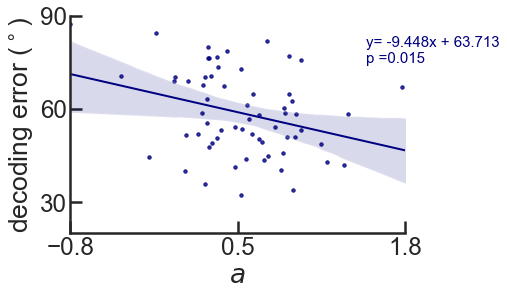

In [31]:
Color = 'navy'

slope, intercept, r_value, p_value, std_err = stats.linregress(Alphas['alpha'], Alphas['decoding_error'])

ax=sns.regplot(x='alpha', y='decoding_error', data=Alphas, color=Color, scatter_kws={'s':12}, 
               line_kws={'linewidth':2, 'alpha':1.})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.text(1.5, 80, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color=Color, fontsize=15)
plt.text(1.5, 75, "p ={0:.3f}".format(p_value), color=Color, fontsize=15)
plt.ylabel('decoding error ($^\circ$)')
plt.xlabel(r'$ a $')
plt.xlim(-0.8, 1.8)
plt.xticks([-0.8,0.5,1.8])
plt.ylim(20,90)
plt.yticks([30,60,90])
plt.show()

#figure = ax.get_figure()    
#figure.savefig('C:\\Users\\David\\Desktop\\alpha_decoding.svg', transparent=True)

In [32]:
result = smf.ols(formula="decoding_error ~ alpha", data=Alphas).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         decoding_error   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     6.230
Date:                Wed, 01 Dec 2021   Prob (F-statistic):             0.0153
Time:                        13:34:39   Log-Likelihood:                -249.75
No. Observations:                  63   AIC:                             503.5
Df Residuals:                      61   BIC:                             507.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.7126      2.588     24.615      0.0

In [ ]:
## for all the TDOA conditions (put together)

In [ ]:
paths1 = ['C:\\Users\\David\\Dropbox\\I0DIBAPS\\Distractor_neurons\\thesis_plots\\signal_HM_DLPFC_100.npy',
         'C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\thesis_plots\\signal_HM_DLPFC_200.npy',
         'C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\thesis_plots\\signal_HM_DLPFC_300.npy',
         'C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\thesis_plots\\signal_HM_DLPFC_900.npy']


paths2 = ['C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\FR_trials\\0_DLPFC.npy',
         'C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\FR_trials\\100_DLPFC.npy',
         'C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\FR_trials\\200_DLPFC.npy',
         'C:\\Users\\David\\Dropbox\\IDIBAPS\\Distractor_neurons\\FR_trials\\800_DLPFC.npy']


# df_control_pfc = df.loc[(df['TDconf']==0) & (df['brain_region']=='DLPFC') & (df['performance']==1) ]
# df_control_pfc['time_centered_s'] = df_control_pfc['time_centered']/1000

ALPHAS = []

for IDX, TDOA in enumerate([100, 200, 300, 900]):
    alphas_=[]
    #target in RF with close and far distractors, DLPFC, correct trials, TDOA de 100 (0,100,2)
    N_all = df.loc[(df['TDconf'].isin([1,2])) & (df['brain_region']=='DLPFC') & (df['performance']==1) & (df['TDOA']==TDOA-100)] ## p=0.12
    #
    for idx, neuron in enumerate(N_all.neuron.unique()):
        N = N_all.loc[N_all['neuron']==neuron]
        N['time_centered_s'] = N['time_centered']/1000
        plt.figure()
        #sns.lineplot(x='time_centered_s', y='norm_firing_gauss', data=df_control_pfc, color='darkgrey', linewidth=2)
        sns.lineplot(x='time_centered_s', y='norm_firing_gauss', data=N, ci=68, color='darkred', linewidth=0.5)
        N1 = N.loc[(N['time_centered']>300) & (N['time_centered']<1700) ] ##100 - 1700 (700 around 1000, 300-1700)
        x = N1.time_centered.unique()/1000
        y = N1.groupby('time_centered').norm_firing_gauss.mean().values
        popt, pcov = curve_fit(parabola_cent, x, y, method='dogbox',  maxfev=1000 )
        #y_fit = [popt[0]*x**2 + popt[1]*x + popt[2] for x in x]
        y_fit = [popt[0]*(x-1)**2 + popt[1]*x + popt[2] for x in x]
        plt.plot(x, y_fit, 'k--', linewidth=1, label='parabolic fit')
        plt.title(str(neuron))
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction
        plt.xlim(-0.5,2)
        plt.ylabel('norm firing rate')
        plt.xlabel('times_centered')
        print(idx, TDOA, neuron, round(popt[0],3))
        plt.show()
        alphas_.append([neuron, round(popt[0],3)])
    #
    #
    Alphas = pd.DataFrame(alphas_)
    Alphas.columns=['neuron', 'alpha']
    #
    path_CTD = paths1[IDX]
    A = np.load(path_CTD)
    decoding_500 = [np.mean(A[x][17:22, 17:22]) for x in range(len(A))] #the lower the worse
    DLPFC_ = np.load(paths2[IDX])
    neuron_ = [Neuron for Neuron in np.unique(DLPFC_[:, 23])]
    #
    decoding_strenght = pd.DataFrame({'decoding error':decoding_500, 'neuron':neuron_} )
    #
    dss=[]
    for i in range(len(Alphas)):
        d_s = decoding_strenght.loc[decoding_strenght['neuron']== str(Alphas['neuron'].iloc[i]), 'decoding error' ].iloc[0]
        dss.append(d_s)
    #
    #
    Alphas['decoding_error']=dss
    Alphas['decoding'] = 1-Alphas['decoding_error']
    Alphas['TDOA']=TDOA
    #
    ALPHAS.append(Alphas)


In [ ]:
Alphas_all_tdoas = pd.concat(ALPHAS)

In [ ]:
Color = 'navy'

slope, intercept, r_value, p_value, std_err = stats.linregress(Alphas_all_tdoas['alpha'], Alphas_all_tdoas['decoding_error'])

ax=sns.regplot(x='alpha', y='decoding_error', data=Alphas_all_tdoas, color=Color, scatter_kws={'s':12}, 
               line_kws={'linewidth':2, 'alpha':1.})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.text(1., 80, "a = {0:.1f} d.e + {1:.1f}".format(slope,intercept), color=Color, fontsize=20)
#plt.text(1., 70, "p = {0:.3f}".format(p_value), color=Color, fontsize=20)
plt.ylabel('decoding error ($^\circ$)')
plt.xlabel(r'$ a $')
plt.xlim(-0.8, 1.8)
plt.xticks([-0.8,0.5,1.8])
plt.ylim(20,90)
plt.yticks([30,60,90])
plt.show()

figure = ax.get_figure()    
#figure.savefig('C:\\Users\\David\\Desktop\\alpha_decoding_tdoa.svg', transparent=True)

result = smf.ols(formula="alpha ~ decoding_error", data=Alphas_all_tdoas).fit()
print(result.summary())

result = smf.ols(formula="alpha ~ decoding_error", data=Alphas_all_tdoas).fit()
print(result.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


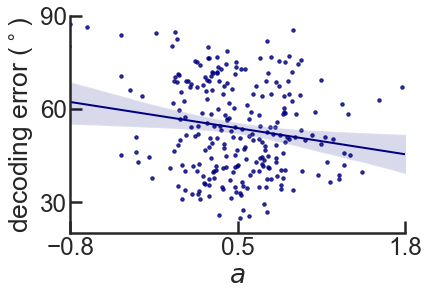

                            OLS Regression Results                            
Dep. Variable:                  alpha   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     7.957
Date:                Wed, 01 Dec 2021   Prob (F-statistic):            0.00517
Time:                        14:45:20   Log-Likelihood:                -124.48
No. Observations:                 252   AIC:                             253.0
Df Residuals:                     250   BIC:                             260.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7484      0.095      7.

In [52]:
Color = 'navy'

slope, intercept, r_value, p_value, std_err = stats.linregress(Alphas_all_tdoas['alpha'], Alphas_all_tdoas['decoding_error'])

ax=sns.regplot(x='alpha', y='decoding_error', data=Alphas_all_tdoas, color=Color, scatter_kws={'s':12}, 
               line_kws={'linewidth':2, 'alpha':1.})
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.text(1., 80, "a = {0:.1f} d.e + {1:.1f}".format(slope,intercept), color=Color, fontsize=20)
#plt.text(1., 70, "p = {0:.3f}".format(p_value), color=Color, fontsize=20)
plt.ylabel('decoding error ($^\circ$)')
plt.xlabel(r'$ a $')
plt.xlim(-0.8, 1.8)
plt.xticks([-0.8,0.5,1.8])
plt.ylim(20,90)
plt.yticks([30,60,90])
plt.show()

figure = ax.get_figure()    
#figure.savefig('C:\\Users\\David\\Desktop\\alpha_decoding_tdoa.svg', transparent=True)

result = smf.ols(formula="alpha ~ decoding_error", data=Alphas_all_tdoas).fit()
print(result.summary())

result = smf.ols(formula="alpha ~ decoding_error", data=Alphas_all_tdoas).fit()
print(result.summary())